In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv('D:\\Data science\\wine.csv')


In [51]:
data = df.iloc[:, 0:14]


In [52]:
original_kmeans=KMeans(n_clusters=3,random_state=42)
df['original_kmeans_cluster']=original_kmeans.fit_predict(data)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data)


In [53]:
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


In [54]:
# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
df_pca['agg_cluster'] = agg_cluster.fit_predict(pca_result)


In [55]:
# Elbow plot for KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)


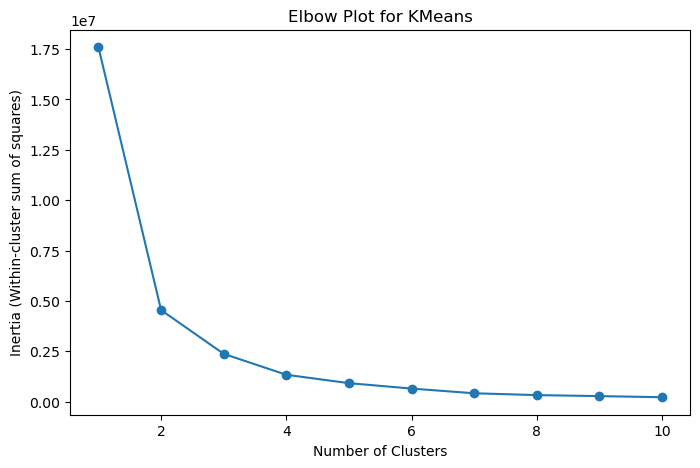

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.show()


In [57]:
optimal_k = 3  # Adjust based on the elbow plot


In [58]:
# KMeans Clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)
df_pca['kmeans_cluster'] = kmeans.fit_predict(pca_result)


In [59]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_pca['dbscan_cluster'] = dbscan.fit_predict(pca_result)
#compare the number of clusters
original_clusters=df['original_kmeans_cluster'].nunique()
pca_clusters=df_pca['kmeans_cluster'].nunique()


In [60]:
print("original kmrans clusters:",original_clusters)
print("PCA kmeans clusters: ",pca_clusters)

original kmrans clusters: 3
PCA kmeans clusters:  3


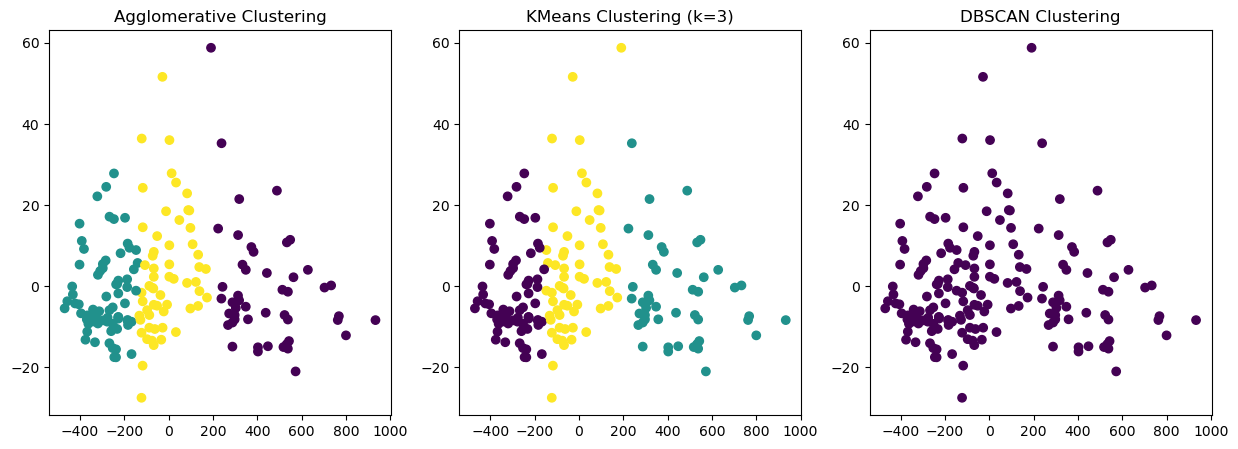

In [61]:
# Visualize the clusters
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['agg_cluster'], cmap='viridis')
axes[0].set_title('Agglomerative Clustering')
axes[1].scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['kmeans_cluster'], cmap='viridis')
axes[1].set_title(f'KMeans Clustering (k={optimal_k})')
axes[2].scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['dbscan_cluster'], cmap='viridis')
axes[2].set_title('DBSCAN Clustering')
plt.show()